Name: Yashh Jaggi
Github Username: yashhjaggi1998
USCID: 459104

### Setup Development Environment

In [53]:
import pandas as pd
import numpy as np

### Pandas

#### The read_csv() Method

First, read the documentation about the *read_csv()* method in Pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Then, try to read data from file Salaries.csv to a dataframe, make the column playerID in the csv file as the index column and the first row as the header. Also, skip the second row when reading the file.

In [54]:
salariesDf = pd.read_csv('../data/salaries.csv', header=0, skiprows=[2])
salariesDf.set_index('playerID', inplace=True)
salariesDf

,yearID,teamID,lgID,salary
playerID,,,,
barkele01,1985,ATL,NL,870000
benedbr01,1985,ATL,NL,545000
campri01,1985,ATL,NL,633333
ceronri01,1985,ATL,NL,625000
chambch01,1985,ATL,NL,800000
...,...,...,...,...
treinbl01,2015,WAS,NL,512800
ugglada01,2015,WAS,NL,507500
werthja01,2015,WAS,NL,21000000


#### Indexing and Selecting Data

Select the id of the players who are registered in ATL and HOU and whose salary is higher than one million.

In [55]:
condition = (salariesDf['teamID'].isin(['ATL', 'HOU'])) & (salariesDf['salary'] > 1000000)
filtered_data = salariesDf.loc[condition].index

print(filtered_data)

Index(['hornebo01', 'murphda05', 'suttebr01', 'ryanno01', 'hornebo01',
       'murphda05', 'suttebr01', 'ryanno01', 'griffke01', 'murphda05',
       ...
       'feldmsc01', 'gonzama01', 'gregelu01', 'lowrije01', 'neshepa01',
       'quallch01', 'rasmuco01', 'singljo02', 'sippto01', 'valbulu01'],
      dtype='object', name='playerID', length=595)


#### The describe() Method

Calculate the standard Deviation, first quartile, medium, third quartile, mean, maximum, minimum of the salary in team ATL.

In [56]:
condition = (salariesDf['teamID'] == 'ATL')
teamATL_data = salariesDf.loc[condition]

mean = teamATL_data['salary'].describe()['mean']
maximum = teamATL_data['salary'].describe()['max']
minimum = teamATL_data['salary'].describe()['min']

quartile_1 = teamATL_data['salary'].describe()['25%']
median = teamATL_data['salary'].describe()['50%']
quartile_3 = teamATL_data['salary'].describe()['75%']

std_dev = teamATL_data['salary'].describe()['std']

#### The iterrows() Method

Create a Python dictionary object whose keys are the headers of the dataframe created in the read_csv() exercise and values are Python list objects that contain data corresponding to the headers. (Here, use the iterrows method to iterate each row of the dataframe and copy it to a dictionary. However, there is a easier way. Learn how the to_dict() method works by yourself later)

In [57]:
dic = {'yearID': [], 'teamID': [], 'lgID': [], 'salary': []}

indexName = salariesDf.index.name

#creating empty dictionary with header values
dic[indexName] = []
for columnName in salariesDf.columns.tolist():
    dic[columnName] = []

#filling data using iterrows()
for row in salariesDf.iterrows():
    dic[indexName].append(row[0])
    
    for columnName in salariesDf.columns.tolist():
        dic[columnName].append(row[1][columnName])

#### Create Dataframe Using the Constructor

Read the documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame and create a dataframe using pd.DataFrame from the dictionary created in the iterrows() exercise. Change the header to "a", "b", "c", ... at creation time.

In [58]:
df = pd.DataFrame.from_dict(dic)
#mapping = {"a": df.columns[0], "b": df.columns[1], "c": df.columns[2], "d": df.columns[3], "e": df.columns[4]}

df.columns=['a', 'b', 'c', 'd', 'e']

### Numpy

Quick start: https://www.numpy.org/devdocs/user/quickstart.html

Numpy axes explaination: https://www.sharpsightlabs.com/blog/numpy-axes-explained/

#### The np.array Method

Example 1:

```python
ls = [1, 2, 3]
arr = np.array(ls)
```

Example 2:
```python
>>> np.array([[1, 2], [3, 4]])
array([[1, 2],
       [3, 4]])
```

Now, create a 2-dimensional Python list object, then convert it to a Numpy array object.

In [59]:
l1 = [[1,2],[3,4]]
np_arr = np.array(l1)

#### ndarray Objects' Attributes

Play with the **ndim, shape, size, dtype, itemsize and data** attribute.

Example:

```python
>>> arr = np.array([[1, 2], [3, 4]])
>>> arr.ndim
2
```

In [60]:
l1 = [ [[1,2,3], [4,5,6]], [[11,12,13],[14,15,16]] ]
l2 = [1,2,3,4,5,6]
np_arr = np.array(l1, dtype=np.float64)

print("Ndim - " + str(np_arr.ndim))
print("Shape - " + str(np_arr.shape))
print("L2 Shape - " + str(np.array(l2).shape))
print("Size - " + str(np_arr.size))
print("Item Size - " + str(np_arr.itemsize)) #gives size of an individual arrayy, say [1,2,3] in bytes
print("dtype - " + str(np_arr.dtype))

print("size - " + str(np_arr.data))

Ndim - 3
Shape - (2, 2, 3)
L2 Shape - (6,)
Size - 12
Item Size - 8
dtype - float64
size - <memory at 0x1435686d0>


#### Dimension of ndarray Ojects

Play with the reshape() and flatten() method.

Example:
```python
>>> arr = np.array([[1, 2], [3, 4]])
>>> arr.flatten()
array([1, 2, 3, 4])
```

In [61]:
l1 = [ [[1,2,3], [4,5,6]], [[11,12,13],[14,15,16]] ]
npArr = np.array(l1)
f = npArr.flatten()
x = np.reshape(npArr, (1,12))
f.shape

(12,)

#### The Slice Operation of ndarray Objects

Understand how the slice operation works for 1-D array and 2-D array.

Example:

```python
>>> arr = np.array([[1, 2, 3], [3, 4, 6], [7, 8, 9]])
>>> arr[1:]
array([[3, 4, 6],
       [7, 8, 9]])
>>> arr[1:, 0:2]
array([[3, 4],
       [7, 8]])
```

#### The Calculation of ndarray Objects

Play with the **argmin(), argmax(), min(), max(), mean(), sum(), std(), dot(), square(), sqrt(), abs(). exp(), sign(), mod()** method.

Example:

```python
>>> np.square(array)
array([[ 1,  4,  9],
       [ 9, 16, 36],
       [49, 64, 81]])

```

#### Other Important Methods Inside Module Numpy

Play with the arange(), ones(), zeros(), eye(), linspace(), concatenate() method.

Example:

```python
>>> np.eye(3)
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])
```

### Scikit-Learn

The followings are packages (or methods) in Python (Scikit-Learn and Scipy) that will be frequently used in your programming assignment. So, please read carefully.

- Data Preprocessing (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
    - Standardization: StandardScaler
    - Normalization: MinMaxScaler
    - Quantifing Categorical Features: LabelEncoder. OneHotEncoder
    - Construct Train and Test Set: model_selection.train_test_split
- KNN: KNeighborsClassifier
- Linear Regression: LinearRegression
- Logistic Regression: LogisticRegression, LogisticRegressionCV
- Feature Selection / Model Selection
    - L1 Penalized Regression (Lasso Regression) with Cross-Validation: LassoCV
    - L2 Penalized Regression (Ridge Regression) with Cross-Validation: RidgeCV
    - Cross-Validation: StratifiedKFold, RepeatedKFold, LeaveOneOut, KFold, model_selection.cross_validate, model_selection.cross_val_predict, model_selection.cross_val_score
    - Model Metrics (https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics): accuracy_score, auc, f1_score, hamming_loss, precision_score, recall_score, roc_auc_score
- Decision Tree: DecisionTreeClassifier, DecisionTreeRegressor
- Bootstrap, Ensemble Methods
    - Bootstrap: bootstrapped (https://pypi.org/project/bootstrapped/)
    - Bagging: RandomForestClassifier, RandomForestRegressor
    - Boosting: AdaBoostClassifier, AdaBoostRegressor
- Support Vector Machines (https://scikit-learn.org/stable/modules/svm.html#svm): LinearSVC, LinearSVR
- Multiclass and Multilabel Classification (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.multiclass)
    - One-vs-one Multiclass Strategy: OneVsOneClassifier
    - One-vs-the-rest (OvR) multiclass/multilabel strategy / OneVsRestClassifier
- Unsupervised Learning
    - K-means Clustering: KMeans
    - Hierarchical Clustering: scipy.cluster.hierarchy (not scikit-learn)
- Semisupervised Learning (https://scikit-learn.org/stable/modules/label_propagation.html)

### Matplotlib

**Quick start:** https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

**Exercises:**

(a) Create two one dimensional arrays x and y and plot y vs x, add title, xlabel, ylabel, grid.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
```

copy the code above to the following cell and add code for plotting the parabola.

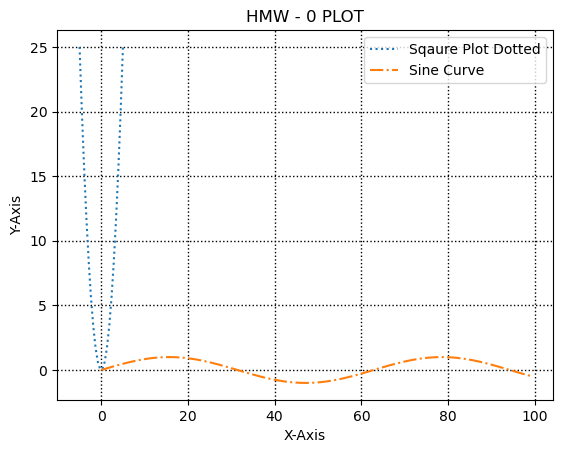

In [62]:
import numpy as np
import matplotlib.pyplot as plt

r = np.arange(0,10, 0.1)

x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])


#x = [20, 40, 60, 80, 100, 120, 140]
#y = [10, 11, 12, 13, 14, 15, 16]

z = np.sin(r)

plt.plot(x, y, ":", label="Sqaure Plot Dotted")
plt.plot(z, "-.", label="Sine Curve")
plt.title("HMW - 0 PLOT")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.grid(color='black', linestyle=':', linewidth=1)
plt.legend()

plt.show()

What happens if the independent variable is not sorted before plotting? Try plotting directly using the following defined array.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
np.random.shuffle(x)
y = np.array([j ** 2 for j in x])
```

Text(-1, 20, 'Random x array')

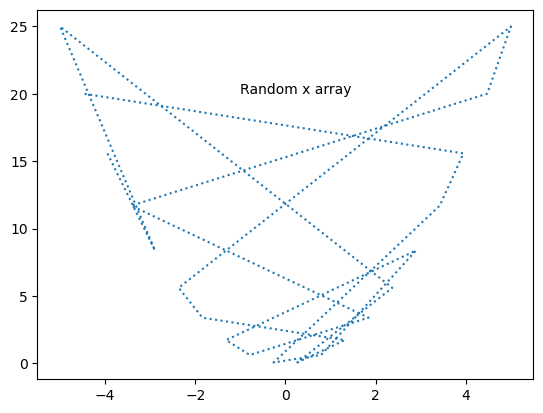

In [63]:
x = np.linspace(-5, 5, num=20)
np.random.shuffle(x)
y = np.array([j ** 2 for j in x])

plt.plot(x, y, ":", label="Random Plot Dotted")
plt.text(-1, 20, r'Random x array')

(b) Create multiple arrays and plot them with different styles, add legends, add text/mathematical equations on the plot.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

Text(0, 50, '$y = x^3$')

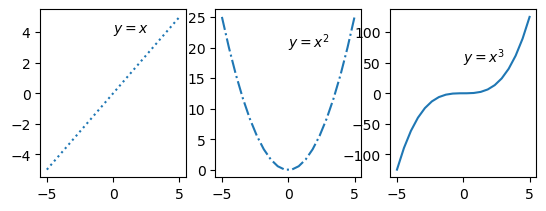

In [64]:
x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

plt.subplot(2,3,1)
plt.plot(x, y1, ":", label="Y1 Plot Dotted")
plt.text(0, 4, r'$y = x$')


plt.subplot(2,3,2)
plt.plot(x, y2, "-.", label="Y1 Plot Dotted")
plt.text(0, 20, r'$y = x^2$')

plt.subplot(2,3,3)
plt.plot(x, y3, "-", label="Y1 Plot Dotted")
plt.text(0, 50, r'$y = x^3$')

(c) Create multiple arrays and plot them into one figure **(No multiple figure and no subplot is allowed in this question)**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

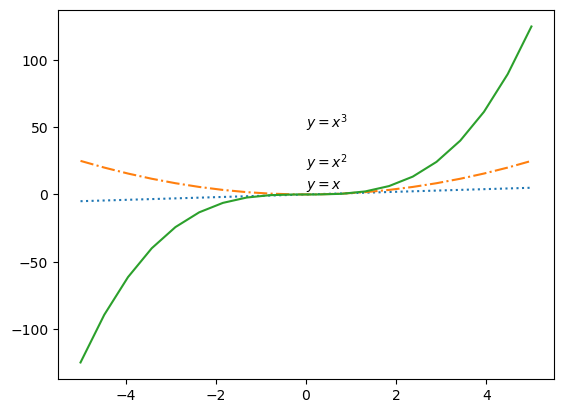

In [65]:
x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

plt.plot(x, y1, ":", label="Y1 Plot Dotted")
plt.text(0, 4, r'$y = x$')

plt.plot(x, y2, "-.", label="Y1 Plot Dotted")
plt.text(0, 20, r'$y = x^2$')

plt.plot(x, y3, "-", label="Y1 Plot Dotted")
plt.text(0, 50, r'$y = x^3$')

plt.show()

(d) Create multiple subplots, play around with the figure size, figure title, and its font style and font size **(One curve is plotted in one subplot in this question)**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

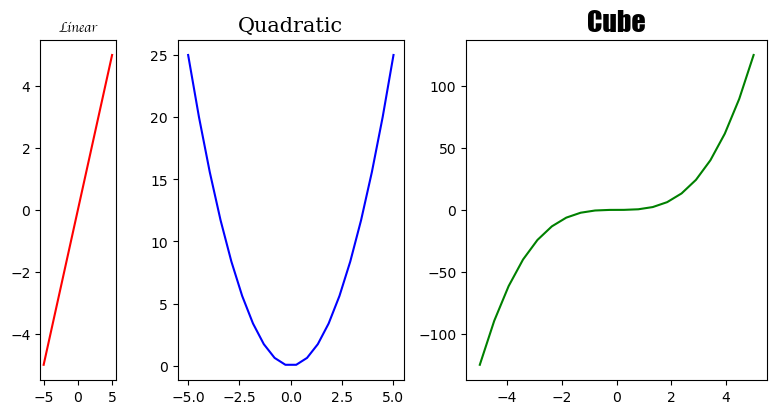

In [66]:
x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

fig, ax = plt.subplots(1, 3, figsize=(8,4), gridspec_kw={'width_ratios': [1, 3, 4]})
fig.tight_layout()

ax[0].plot(x, y1, color='red')
ax[0].title.set_text("Linear")
ax[0].title.set_size(10)
ax[0].title.set_family("cursive")

ax[1].plot(x, y2, color='blue')
ax[1].title.set_text("Quadratic")
ax[1].title.set_size(15)
ax[1].title.set_family("serif")

ax[2].plot(x, y3, color="green")
ax[2].title.set_text("Cube")
ax[2].title.set_size(20)
ax[2].title.set_family("fantasy")


(e) Change the limits on x and y axes, **use logarithmic axes to plot**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
```

copy the code above to the following cell and add code for plotting the parabola.

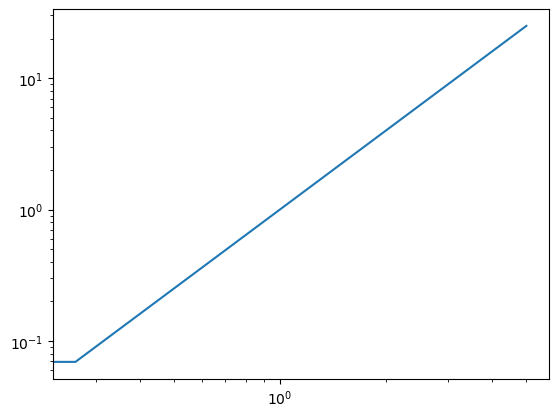

In [67]:
x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])

plt.yscale("log")
plt.xscale("log")
plt.plot(x,y)

### Pandas's DataFrame.plot and Seaborn

#### Pandas's DataFrame.plot

Use the Salaries.csv again (You can use the dataframe object loaded from section 3.1).

(a) For team 'ATL', plot a scatter plot between feature yearID and salary.

(b) For year 1985, plot a bar chart to show the average salary for each team.

(c) For team 'ATL', plot a line chart to show how the annual average salary change by years.

#### Seaborn

(a) Append one more numeric feature to the data frame (can be generated randomly), then for team 'ATL', use the seaborn.pairplot to plot scatter plots among all numeric features in the data frame for team. 

(b) For year 1985 and for each team, plot a boxplot to show how the salary distribute within a team.

(c) Read the offical documentation (https://seaborn.pydata.org/) to understand how lmplot, catplot, relplot, and jointplot works.

### Jupyter Notebook

#### Jupyter Notebook Extensions

Extensions such as the code formatter, table of content is to make your development more efficient. To explore it, please refer to https://github.com/ipython-contrib/jupyter_contrib_nbextensions.

#### Jupyter Visual Debugger

The Pixie Debugger is a visual debugger for debugging on Jupyter Notebook. To explore it, please refer to https://medium.com/codait/the-visual-python-debugger-for-jupyter-notebooks-youve-always-wanted-761713babc62.

### Git and GitHub

1. In the directory that where this jupyter notebook file locates in, init a Git repository.
2. Checkout a new branch called dev and commit the current notebook within this branch.
3. Merge the dev branch to the master branch (the default branch).
4. Create a temporary repository (just for practicing and you can delete it later) in GitHub. 
5. Push new changes in the master branch to the remote repository created in step 4.
6. Checkout the dev branch again and do some changes to your notebook, and then repeat step 3 and step 5.